In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\91958\Downloads\UberDataset.csv")

In [4]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# Checking Null Values

In [5]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [6]:
df['PURPOSE']=df['PURPOSE'].fillna('Not Defined')

In [7]:
df.isna().sum()

START_DATE    0
END_DATE      1
CATEGORY      1
START         1
STOP          1
MILES         0
PURPOSE       0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Checking Data Types

In [11]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

# Changing data types 

In [12]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [14]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [15]:
df['MILES'] = pd.to_numeric(df['MILES'])

In [16]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

# Check For Noise Value

In [18]:
for i in df:
    print(i, df[i].unique(), "\n", sep="\n")

START_DATE
['2016-01-01T21:11:00.000000000' '2016-01-02T01:25:00.000000000'
 '2016-01-02T20:25:00.000000000' ... '2016-12-31T15:03:00.000000000'
 '2016-12-31T21:32:00.000000000' '2016-12-31T22:08:00.000000000']


END_DATE
['2016-01-01T21:17:00.000000000' '2016-01-02T01:37:00.000000000'
 '2016-01-02T20:38:00.000000000' ... '2016-12-31T15:38:00.000000000'
 '2016-12-31T21:50:00.000000000' '2016-12-31T23:51:00.000000000']


CATEGORY
['Business' 'Personal']


START
['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Whitebridge' 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Tanglewood' 'Preston' 'Eastgate'
 'East Elmhurst' 'Jackson Heights' 'Long Island City' 'Katunayaka'


In [19]:
df['START']=df['START'].str.replace('?','')

C:\Users\91958\AppData\Local\Temp\ipykernel_14620\4141741947.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['START']=df['START'].str.replace('?','')


In [20]:
df['START'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'Rwalpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Convent

# Checking Duplicates

In [22]:
df.duplicated().sum()

1

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

# Calculate Trip Durations:

In [25]:
df['Trip_Duration'] = df['END_DATE'] - df['START_DATE']


In [26]:
df.head(4)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Trip_Duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Defined,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00


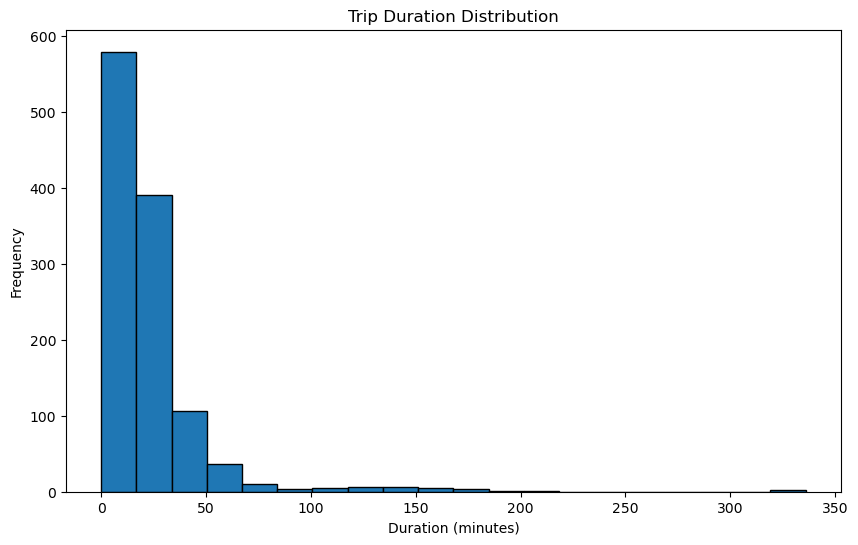

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Trip_Duration'].dt.total_seconds() / 60, bins=20, edgecolor='k')
plt.title("Trip Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

# Analyze Trip Categories

In [28]:
category_counts = df['CATEGORY'].value_counts()
category_counts

Business    1077
Personal      77
Name: CATEGORY, dtype: int64

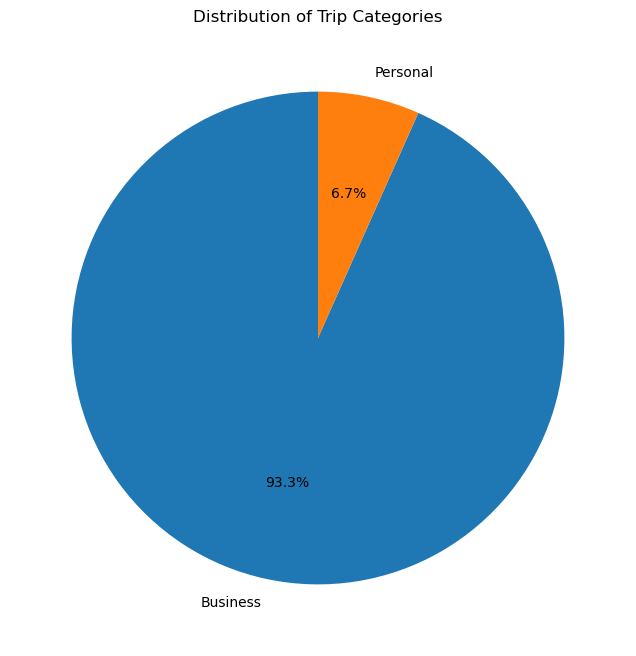

In [33]:

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Trip Categories")
plt.show()


# Calculate Average Trip Distance:

In [34]:
average_distance = df['MILES'].mean()


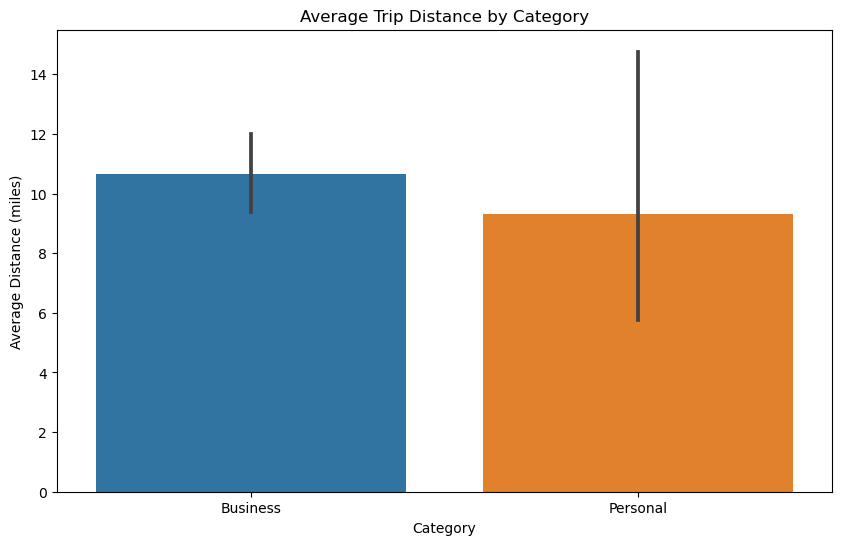

In [35]:

plt.figure(figsize=(10, 6))
sns.barplot(x='CATEGORY', y='MILES', data=df)
plt.title("Average Trip Distance by Category")
plt.xlabel("Category")
plt.ylabel("Average Distance (miles)")
plt.show()


# Time-Based Analysis

In [38]:
# Example: Find the most common day of the week for trips
df['Day_of_Week'] = df['START_DATE'].dt.day_name()


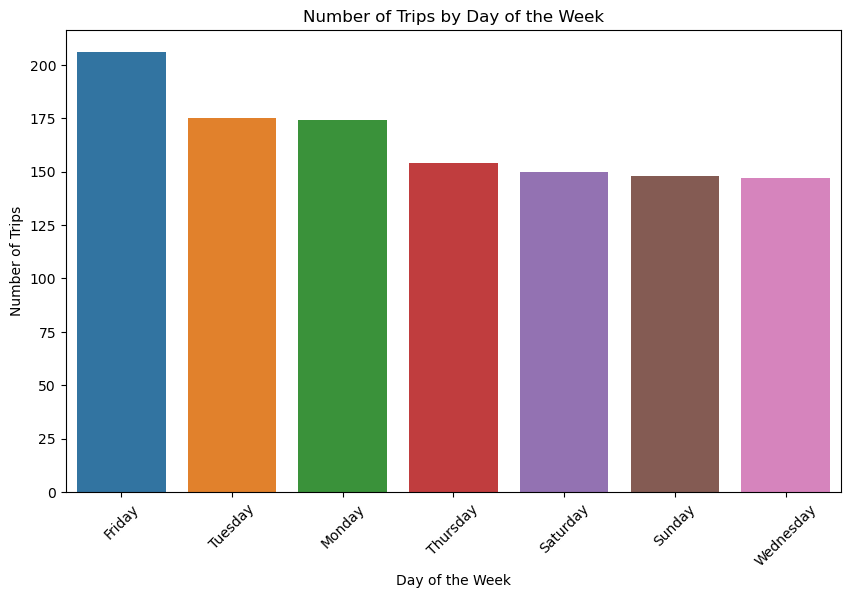

In [40]:
# Count the number of trips for each day of the week
day_of_week_counts = df['Day_of_Week'].value_counts()

# Create a bar chart to visualize the number of trips for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts)
plt.title("Number of Trips by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

# Miles Driven Analysis

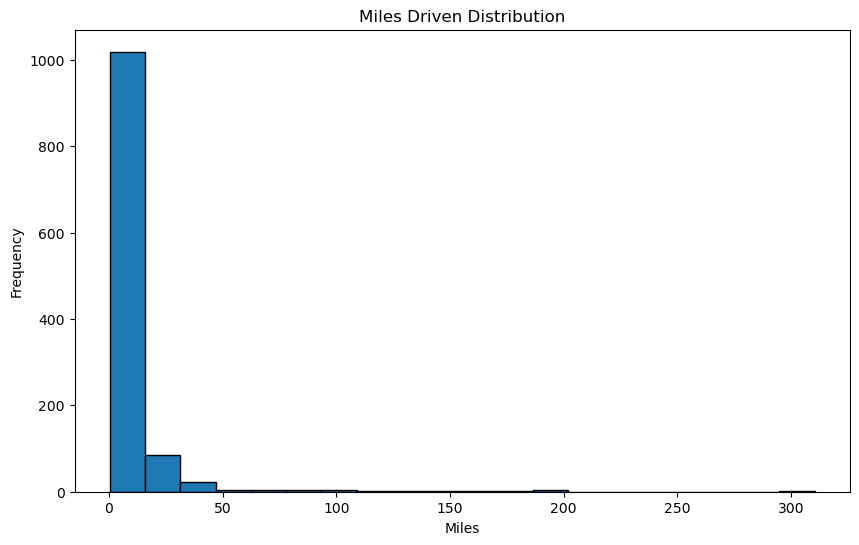

In [42]:
# distribution of miles driven (histogram)
plt.figure(figsize=(10, 6))
plt.hist(df['MILES'], bins=20, edgecolor='k')
plt.title("Miles Driven Distribution")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()


# Trips by Hour and Day

ValueError: Unknown format code 'd' for object of type 'float'

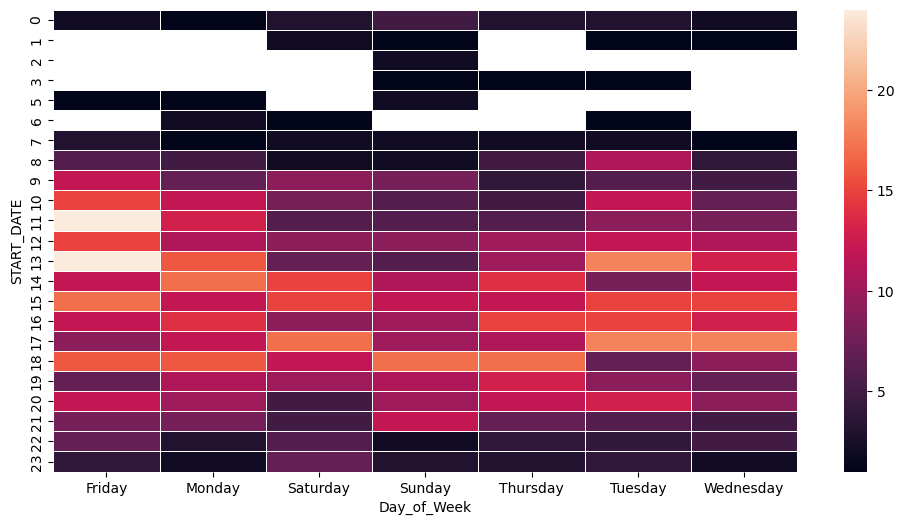

In [45]:
# trips by hour and day of the week
hour_day_counts = df.groupby([df['START_DATE'].dt.hour, df['Day_of_Week']])['START_DATE'].count().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hour_day_counts, annot=True, fmt='d', linewidths=.5)
plt.title("Trips by Hour and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()


# Miles vs. Trip Duration

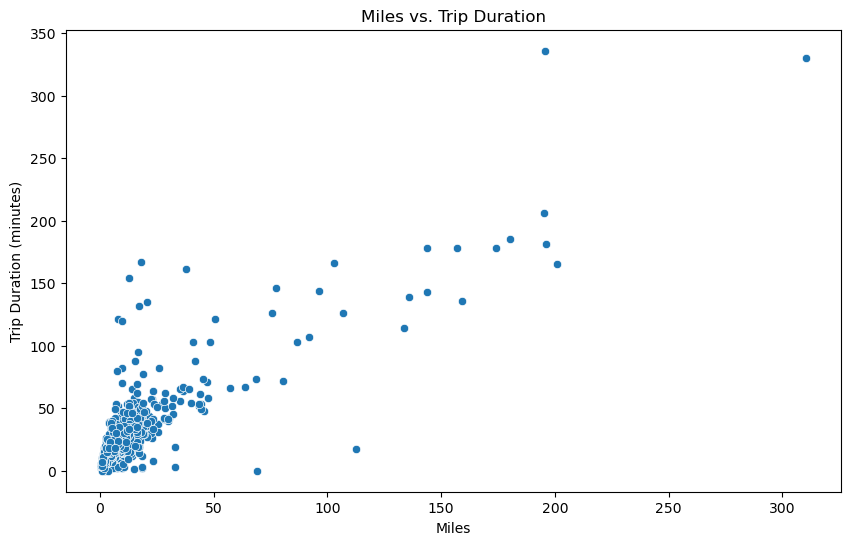

In [46]:
# Scatter plot of miles vs. trip duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MILES', y=df['Trip_Duration'].dt.total_seconds() / 60)
plt.title("Miles vs. Trip Duration")
plt.xlabel("Miles")
plt.ylabel("Trip Duration (minutes)")
plt.show()


# Most Frequent Start and Stop Locations

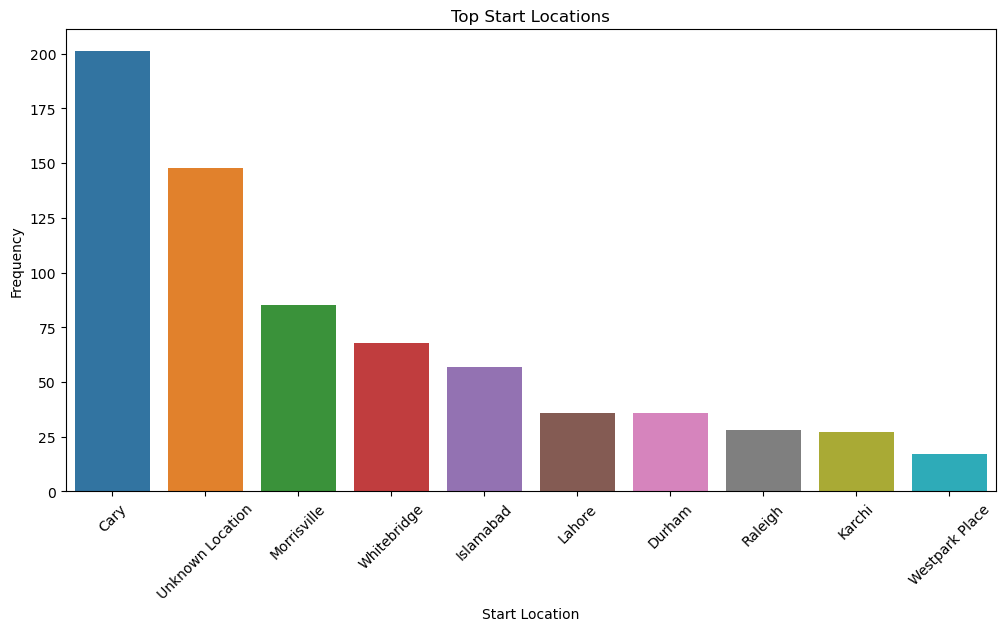

In [48]:
#  most frequent start locations (top 10 locations)
top_start_locations = df['START'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_start_locations.index, y=top_start_locations.values)
plt.title("Top Start Locations")
plt.xlabel("Start Location")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


# Hourly Trip Trends

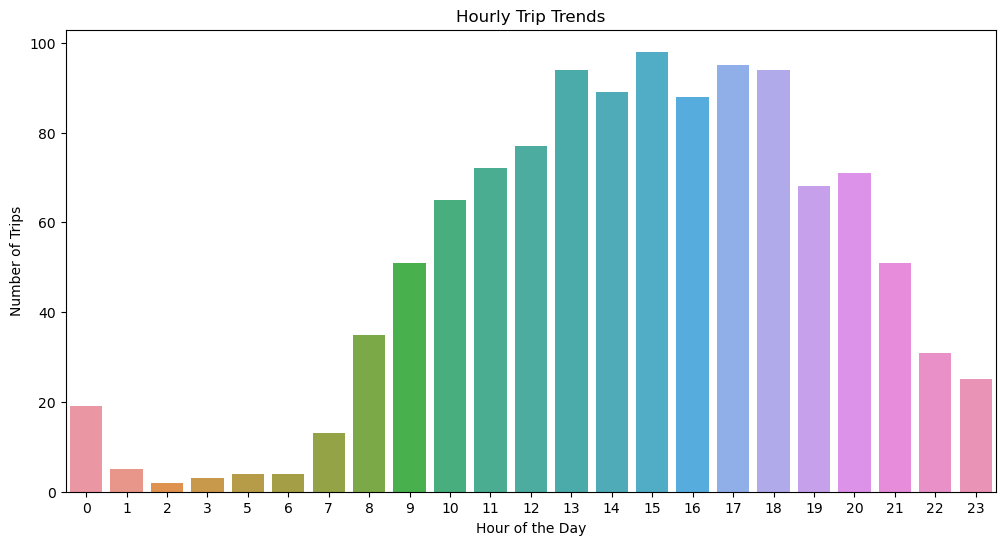

In [52]:
# hourly trip trends
hourly_trip_counts = df['START_DATE'].dt.hour.value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values)
plt.title("Hourly Trip Trends")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.show()
